## Fronteira Eficiente de Markowitz

In [1]:
# vamos importar os módulos necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

### Usando dados do Yahoo Finance

In [2]:
from pandas_datareader import data as pdr
yf.pdr_override()
acoes = ['PETR4.SA', 'VALE3.SA', 'BBAS3.SA']
# definir data de início e fim
start = datetime(2022, 1, 1)
end = datetime(2022, 12, 31)
dados = pdr.get_data_yahoo(acoes, start, end, progress=False) ['Adj Close']

In [3]:
# checando os dados e analisando
#dados.head()
#dados.tail()
dados.describe()

,BBAS3.SA,PETR4.SA,VALE3.SA
count,250.000000,250.000000,250.000000
mean,32.201503,18.191979,73.180008
std,3.354975,3.070133,7.866351
min,24.660267,13.171387,59.562160
25%,30.150053,15.569504,66.522284
50%,31.511716,17.280463,72.852455
75%,34.682595,20.619411,79.563301
max,40.954655,26.555788,91.060692


### Calculando os retornos

In [4]:
# calculo dos retornos diários e anuais
retorno_diario = dados.pct_change()
retorno_anual = retorno_diario.mean()*250

In [5]:
retorno_diario.tail()

,BBAS3.SA,PETR4.SA,VALE3.SA
Date,,,
2022-12-23,0.024688,0.047103,0.006647
2022-12-26,-0.001417,-0.007166,0.009152
2022-12-27,-0.033210,0.006816,0.023878
2022-12-28,0.017910,-0.012346,-0.002242
2022-12-29,0.001731,-0.012097,-0.001236


### Calculando a covariância

In [6]:
# cálculo da covariância diária e anual
cov_diaria = retorno_diario.cov()
cov_anual = cov_diaria*250

### Criando listas para armanezar as principais variáveis

In [7]:
# vamos criar 4 listas para armazenar os valores do retorno da carteira, o peso de cada ação, a volatilidade e o sharpe ratio
# empty lists to store returns, volatility and weights of imiginary portfolios
retorno_carteira = []
peso_acoes = []
volatilidade_carteira = []
sharpe_ratio = []

### Simulando o número de portfólios

In [8]:
# vamos usar uma simulação aleatória
numero_acoes = len(acoes)
numero_carteiras = 100000

np.random.seed(101)

In [9]:
# vamos fazer um for loop para preencher as lista que criamos anteriormente
for cada_carteira in range(numero_carteiras):
    # vamos dar um peso aleatório para cada ação dentro de cada carteira
    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    # vamos calcular o retorno das carteiras
    retorno = np.dot(peso, retorno_anual)
    # vamos calcular a volatilidade das carteiras
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))
    # vamos calcular o índice de Sharpe de cada carteira
    sharpe = retorno / volatilidade
    # aqui nós usamos o método apend para incluir cada carteira nas listas criadas anteriormente
    sharpe_ratio.append(sharpe)
    retorno_carteira.append(retorno)
    volatilidade_carteira.append(volatilidade)
    peso_acoes.append(peso)

### Criando dicionário com os dados

In [10]:
carteira = {'Retorno': retorno_carteira,
             'Volatilidade': volatilidade_carteira,
             'Sharpe Ratio': sharpe_ratio}

for contar,acao in enumerate(acoes):
    carteira[acao+' Peso'] = [Peso[contar] for Peso in peso_acoes]

# vamos transformar nosso dicionário em um dataframe
df = pd.DataFrame(carteira)

# vamos nomear as colunas do novo dataframe
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]
df = df[colunas]

### Criando o gráfico da fronteira eficiente

C:\Users\eduardo.ramos\AppData\Local\Temp\ipykernel_5276\3475351794.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


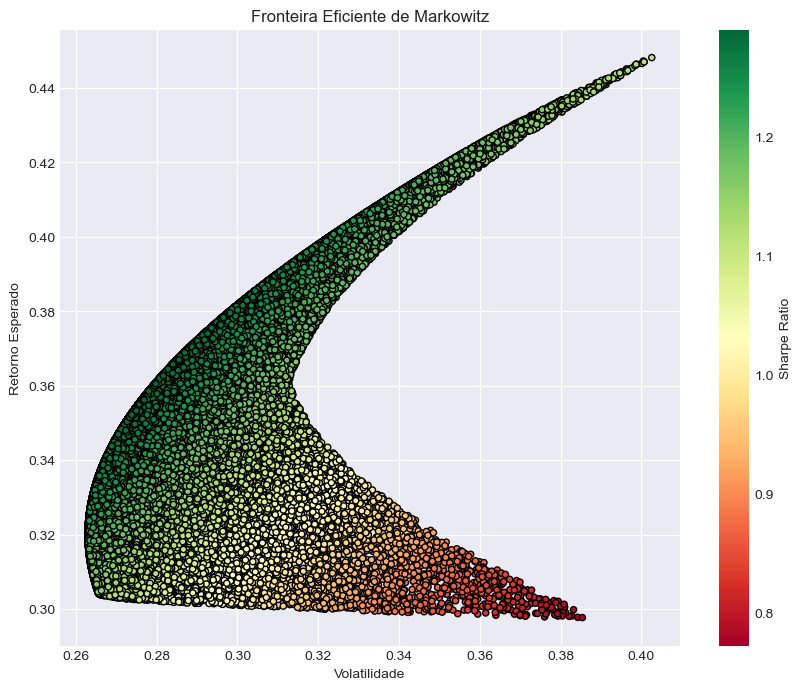

In [11]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

### Identificando o melhor Sharpe Ratio e a carteira de mínima variância

In [12]:
# vamos identificar as variáveis de interesse
menor_volatilidade = df['Volatilidade'].min()
maior_sharpe = df['Sharpe Ratio'].max()

# vamos identificar os dois principais portfolios
carteira_sharpe = df.loc[df['Sharpe Ratio'] == maior_sharpe]
carteira_min_variancia = df.loc[df['Volatilidade'] == menor_volatilidade]

### Criando novo gráfico da fronteira eficiente

C:\Users\eduardo.ramos\AppData\Local\Temp\ipykernel_5276\3074554039.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


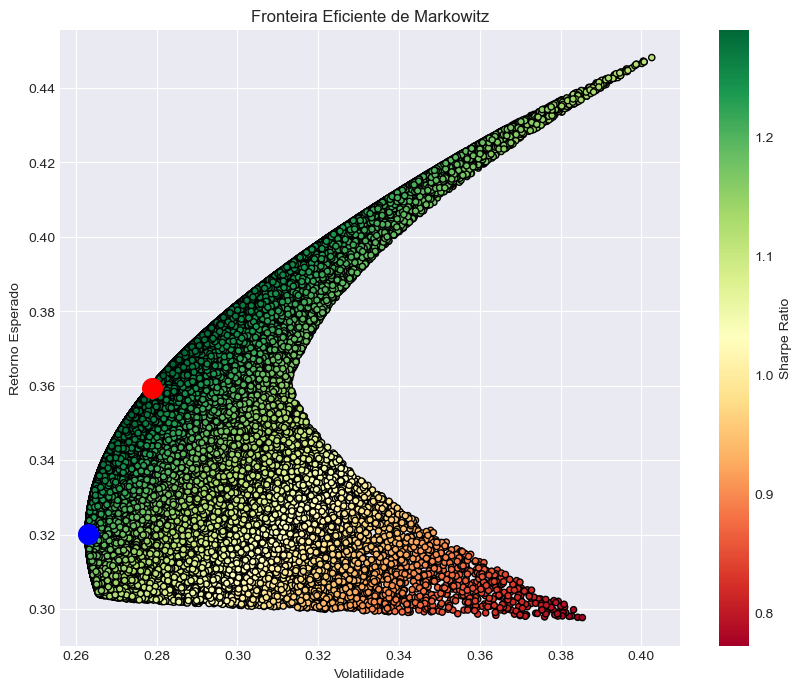

In [13]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=carteira_sharpe['Volatilidade'], y=carteira_sharpe['Retorno'], c='red', marker='o', s=200)
plt.scatter(x=carteira_min_variancia['Volatilidade'], y=carteira_min_variancia['Retorno'], c='blue', marker='o', s=200 )
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

### Analisando as duas principais carteiras

In [14]:
print ("Essa é a carteira de Mínima Variância:", '\n', carteira_min_variancia.T)
print ('-'*40)
print ("Essa é a carteira com maior Sharpe Ratio:", '\n', carteira_sharpe.T)

Essa é a carteira de Mínima Variância: 
                   92277
Retorno        0.320065
Volatilidade   0.263021
Sharpe Ratio   1.216883
PETR4.SA Peso  0.517852
VALE3.SA Peso  0.110706
BBAS3.SA Peso  0.371442
----------------------------------------
Essa é a carteira com maior Sharpe Ratio: 
                   44939
Retorno        0.359518
Volatilidade   0.278767
Sharpe Ratio   1.289670
PETR4.SA Peso  0.320847
VALE3.SA Peso  0.385689
BBAS3.SA Peso  0.293463
